In [1]:
#IMPORTING NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
import random

In [2]:
df = pd.read_excel('C:/Users/shubh/Desktop/project.xlsx','Sheet2')
df 

,State,District,Rural /urban classification,"Sex ratio of the total population (females per 1,000 males)",Sex ratio at birth for children born in the last five years,Women who are literate (%),Men who are literate (%),Women with 10 or more years of schooling (%),Households with an improved drinking-water source1 (%),Households using improved sanitation facility2 (%),Households using clean fuel for cooking3,Quality of life indicator,Institutional births (%)
0,PUNJAB,Amritsar,both,916,772,78.5,85.0,53.1,100.0,78.3,72.8,0.655296,90.0
1,PUNJAB,Barnala,both,873,1026,77.1,80.6,46.0,98.9,85.5,54.4,0.499831,96.3
2,PUNJAB,Bathinda,both,914,991,76.2,88.6,50.8,96.7,85.0,62.7,0.339062,94.7
3,PUNJAB,Faridkot,both,888,968,76.9,83.9,50.3,97.3,83.7,64.2,0.392529,95.5
4,PUNJAB,"Fatehgarh Sahib,",both,927,872,88.4,95.2,58.5,99.5,83.0,69.4,0.647418,94.3
5,PUNJAB,Firozpur,rural,907,1014,67.7,82.4,34.5,99.7,96.8,77.1,0.939772,86.0
6,PUNJAB,Gurdaspur,rural,898,829,88.2,90.4,62.7,99.6,74.7,69.8,0.535656,87.3
7,PUNJAB,Hoshiarpur,rural,943,894,90.4,81.7,64.3,99.8,76.2,62.7,0.519463,91.3
8,PUNJAB,Jalandhar,both,953,711,89.1,90.5,68.6,99.8,89.2,78.7,0.848542,95.7
9,PUNJAB,Kapurthala,both,958,776,87.1,87.3,59.8,98.8,81.8,76.1,0.614306,91.2


In [3]:
#MIN_MAX scaling. the reason for choosing min_max scaling to bring about relative differences between districts
#and also allow us to compare data points by sclaing them in the interval(0,1)

df['sex ratio scaled'] = (df['Sex ratio of the total population (females per 1,000 males)'] - min(df['Sex ratio of the total population (females per 1,000 males)']))/(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
df['Child sex ratio scaled'] = (df['Sex ratio at birth for children born in the last five years'] - min(df['Sex ratio at birth for children born in the last five years']))/(max(df['Sex ratio at birth for children born in the last five years'])-min(df['Sex ratio at birth for children born in the last five years']))
df['Mens Literacy rate scaled'] = ((df['Men who are literate (%)'] - min(df['Men who are literate (%)']))/(max(df['Men who are literate (%)'])-min(df['Men who are literate (%)'])))
df['Womens Literacy rate scaled'] = (df['Women who are literate (%)'] - min(df['Women who are literate (%)']))/(max(df['Women who are literate (%)'])-min(df['Women who are literate (%)']))
df['Women with > 10 years of schooling scaled'] = (df['Women with 10 or more years of schooling (%)'] - min(df['Women with 10 or more years of schooling (%)']))/(max(df['Women with 10 or more years of schooling (%)'])-min(df['Women with 10 or more years of schooling (%)']))
df['Institutional births'] = (df['Institutional births (%)'] - min(df['Institutional births (%)']))/(max(df['Institutional births (%)'])-min(df['Institutional births (%)']))


In [4]:
#NORMAL scaling. the reason for choosing min_max scaling to bring about relative differences between districts
#and also allow us to compare data points by sclaing them in the interval(0,1)

#df['sex ratio scaled'] = (df['Sex ratio of the total population (females per 1,000 males)'] - (df['Sex ratio of the total population (females per 1,000 males)'].mean()))/(df['Sex ratio of the total population (females per 1,000 males)'].std())
#df['Child sex ratio scaled'] = (df['Sex ratio at birth for children born in the last five years'] - (df['Sex ratio at birth for children born in the last five years'].mean()))/(df['Sex ratio at birth for children born in the last five years'].std())
#df['Mens Literacy rate scaled'] = ((df['Men who are literate (%)'] - df['Men who are literate (%)'].mean()))/(df['Men who are literate (%)'].std())
#df['Womens Literacy rate scaled'] = ((df['Women who are literate (%)'] - df['Women who are literate (%)'].mean()))/(df['Women who are literate (%)'].std())
#df['Women with > 10 years of schooling scaled'] =  ((df['Women with 10 or more years of schooling (%)'] - df['Women with 10 or more years of schooling (%)'].mean()))/(df['Women with 10 or more years of schooling (%)'].std())
#df['Institutional births'] = ((df['Institutional births (%)'] - df['Institutional births (%)'].mean()))/(df['Institutional births (%)'].std())



In [5]:
# Rural urban classification is a categorical variable whuch needs to be accounted for. hence categorical variable encoding
# also encoding by 0.5 instead of one because since all data points have beeen scaled in the interval 0,1(uniform) distribution
# its suitable to encide categorical variables by 0.5. Value of 1 may lead to categorical variable playing a dominant role in 
# classification algorithm(k-means)

df.loc[df['Rural /urban classification'] == 'rural', 'ruc1'] = .5
df.loc[df['Rural /urban classification'] != 'rural', 'ruc1'] = 0
df.loc[df['Rural /urban classification'] == 'urban', 'ruc2'] = .5
df.loc[df['Rural /urban classification'] != 'urban', 'ruc2'] = 0
#df.loc[df['Rural /urban classification'] == 'both', 'ruc3'] = 1 # dummy variable trap.if its both then it automatically becomes 0
#df.loc[df['Rural /urban classification'] != 'both', 'ruc3'] = 0
Scale_df = df[['District','ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']]
Scale_df 


,District,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births
0,Amritsar,0.0,0.0,0.370861,0.137698,0.435,0.475771,0.545455,0.655296,0.520833
1,Barnala,0.0,0.0,0.086093,0.711061,0.215,0.414097,0.337243,0.499831,0.958333
2,Bathinda,0.0,0.0,0.357616,0.632054,0.615,0.374449,0.478006,0.339062,0.847222
3,Faridkot,0.0,0.0,0.185430,0.580135,0.380,0.405286,0.463343,0.392529,0.902778
4,"Fatehgarh Sahib,",0.0,0.0,0.443709,0.363431,0.945,0.911894,0.703812,0.647418,0.819444
5,Firozpur,0.5,0.0,0.311258,0.683973,0.305,0.000000,0.000000,0.939772,0.243056
6,Gurdaspur,0.5,0.0,0.251656,0.266366,0.705,0.903084,0.826979,0.535656,0.333333
7,Hoshiarpur,0.5,0.0,0.549669,0.413093,0.270,1.000000,0.873900,0.519463,0.611111
8,Jalandhar,0.0,0.0,0.615894,0.000000,0.710,0.942731,1.000000,0.848542,0.916667
9,Kapurthala,0.0,0.0,0.649007,0.146727,0.550,0.854626,0.741935,0.614306,0.604167


In [6]:
#extrapolatory data analysis
#SInce we are intrested in Sex ratio and child sex ratio, our foccus would be relationship of these variables 
#with other variables
Scale_df.corr()

,ruc1,ruc2,sex ratio scaled,Child sex ratio scaled,Mens Literacy rate scaled,Womens Literacy rate scaled,Women with > 10 years of schooling scaled,Quality of life indicator,Institutional births
ruc1,1.000000,NaN,0.168128,0.187190,-0.121541,-0.229739,-0.336186,-0.233033,-0.300961
ruc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex ratio scaled,0.168128,NaN,1.000000,0.214411,0.346817,0.420751,0.343012,0.123657,0.180446
Child sex ratio scaled,0.187190,NaN,0.214411,1.000000,-0.141514,-0.258038,-0.379338,-0.159976,0.196390
Mens Literacy rate scaled,-0.121541,NaN,0.346817,-0.141514,1.000000,0.534940,0.504899,0.160537,0.154098
Womens Literacy rate scaled,-0.229739,NaN,0.420751,-0.258038,0.534940,1.000000,0.958881,0.329006,0.073014
Women with > 10 years of schooling scaled,-0.336186,NaN,0.343012,-0.379338,0.504899,0.958881,1.000000,0.324970,0.026344
Quality of life indicator,-0.233033,NaN,0.123657,-0.159976,0.160537,0.329006,0.324970,1.000000,-0.270219
Institutional births,-0.300961,NaN,0.180446,0.196390,0.154098,0.073014,0.026344,-0.270219,1.000000


In [35]:
def regressions(pd1 , pd2):
    data1 = pd.DataFrame(pd1)
    data2 = pd.DataFrame(pd2)
    plt.scatter(data1,data2, c ='Red')
    cov = (((data1*data2).mean())-(data1.mean()*data2.mean())).mean()
    slope = cov/data1.var()
    lm = (data1)* slope
    z= (data2 - lm).mean()
    lm = lm+z
    plt.scatter(data1 ,lm)
    R2 = ((lm - data2)**2).sum()/(((data2-data2.mean())**2).sum())
    R2 = 1- R2
    print(" Slope is ", slope)
    print("The R^2 value for the above regression is",R2)
    
    
    

    


0.3216155788571228

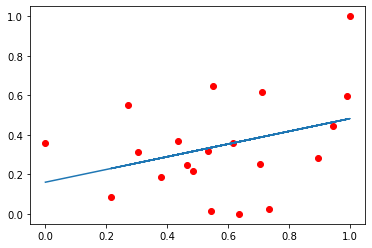

In [8]:
#simple linear regression between sex ratio and Mens literacy rate

plt.scatter(Scale_df['Mens Literacy rate scaled'], Scale_df['sex ratio scaled'], c ='Red')

slope = (Scale_df.cov().loc['Mens Literacy rate scaled','sex ratio scaled'])/(Scale_df['Mens Literacy rate scaled'].var())

lm = (Scale_df['Mens Literacy rate scaled'])* slope
z= (Scale_df['sex ratio scaled'] - lm).mean()
lm = lm + z # predicted value of sex ratio
plt.plot(Scale_df['Mens Literacy rate scaled'],lm)
l = len(Scale_df['sex ratio scaled'])
slope


The R^2 value for the above regression is 0    0.119981
dtype: float64
 Slope is  0    0.305535
dtype: float64


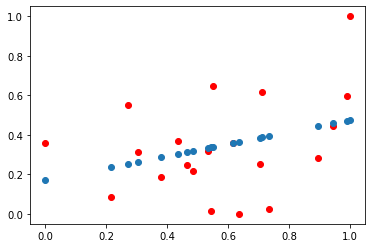

In [37]:
regressions(Scale_df['Mens Literacy rate scaled'].values, Scale_df['sex ratio scaled'].values)`b


The R^2 value for the above regression is 0    0.176589
dtype: float64
 Slope is  0    0.324741
dtype: float64


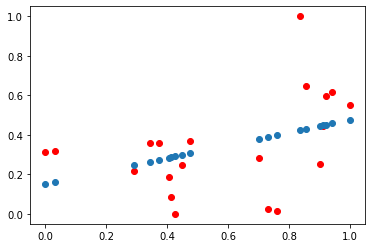

In [40]:
regressions(Scale_df['Womens Literacy rate scaled'].values, Scale_df['sex ratio scaled'].values)

The R^2 value for the above regression is 0    0.117363
dtype: float64
 Slope is  0    0.306244
dtype: float64


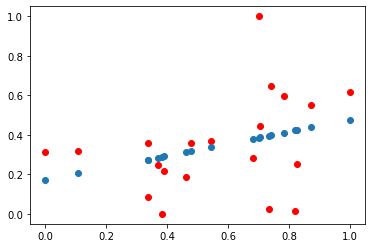

In [41]:
regressions(Scale_df['Women with > 10 years of schooling scaled'].values, Scale_df['sex ratio scaled'].values)

The R^2 value for the above regression is 0    0.015253
dtype: float64
 Slope is  0    0.169042
dtype: float64


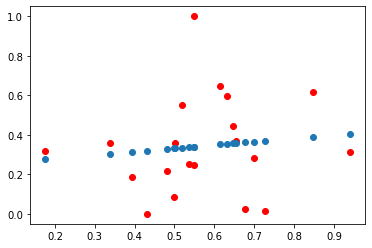

In [42]:
regressions(Scale_df['Quality of life indicator'].values, Scale_df['sex ratio scaled'].values)

In [28]:
R2 = ((lm - Scale_df['sex ratio scaled'])**2).sum()/(((Scale_df['sex ratio scaled']-Scale_df['sex ratio scaled'].mean())**2).sum())
R2 = 1- R2
print("The R^2 value for the above regression is",R2)


The R^2 value for the above regression is 0.12028179823692609


In [ ]:
plt.scatter(Scale_df['Quality of life indicator'], Scale_df['sex ratio scaled'], c ='Red')

slope = (Scale_df.cov().loc['Quality of life indicator','sex ratio scaled'])/(Scale_df['Quality of life indicator'].var())

lm = (Scale_df['Quality of life indicator'])* slope
z= (Scale_df['sex ratio scaled'] - lm).mean()
lm = lm + z # predicted value of sex ratio
plt.plot(Scale_df['Quality of life indicator'],lm)
slope

In [ ]:
R2 = ((lm - Scale_df['sex ratio scaled'])**2).sum()/(((Scale_df['sex ratio scaled']-Scale_df['sex ratio scaled'].mean())**2).sum())
R2 = 1- R2
print("The R^2 value for the above regression is",R2)


In [ ]:
plt.scatter(Scale_df['Mens Literacy rate scaled'], Scale_df['Child sex ratio scaled'], c ='Red')

slope= (Scale_df.cov().loc['Mens Literacy rate scaled','Child sex ratio scaled'])/(Scale_df['Mens Literacy rate scaled'].var())
lm = Scale_df['Mens Literacy rate scaled']*slope
z= (Scale_df['Child sex ratio scaled'] - lm).mean()
lm = lm + z
plt.plot(Scale_df['Mens Literacy rate scaled'],lm)


In [ ]:
R2 = 1- ((lm - Scale_df['Child sex ratio scaled'])**2).sum()/(((Scale_df['Child sex ratio scaled']-Scale_df['Child sex ratio scaled'].mean())**2).sum())
print("the R^2 value for above regression is ", R2)


In [ ]:
plt.scatter(Scale_df['Womens Literacy rate scaled'], Scale_df['sex ratio scaled'], c ='Red')

Slope = (Scale_df.cov().loc['Womens Literacy rate scaled','sex ratio scaled'])/(Scale_df['Womens Literacy rate scaled'].var())
lm = Scale_df['Womens Literacy rate scaled']*slope
z= (Scale_df['sex ratio scaled'] - lm).mean()
lm = lm + z
plt.plot(Scale_df['Womens Literacy rate scaled'],lm)
slope

In [ ]:
R2 = 1- ((lm - Scale_df['sex ratio scaled'])**2).sum()/(((Scale_df['sex ratio scaled']-Scale_df['sex ratio scaled'].mean())**2).sum())
print("the R^2 value for above regression is ", R2)

In [ ]:
plt.scatter(Scale_df['Women with > 10 years of schooling scaled'], Scale_df['Quality of life indicator'], c ='Red')
slope = (Scale_df.cov().loc['Women with > 10 years of schooling scaled','Quality of life indicator'])/(Scale_df['Women with > 10 years of schooling scaled'].var())
lm = Scale_df['Women with > 10 years of schooling scaled']*slope
z= (Scale_df['Quality of life indicator'] - lm).mean()
lm = lm + z #predicted values
plt.plot(Scale_df['Women with > 10 years of schooling scaled'],lm)
slope

In [ ]:
R2 =  ((lm - Scale_df['Quality of life indicator'])**2).sum()/(((Scale_df['Quality of life indicator']-Scale_df['Quality of life indicator'].mean())**2).sum())
                                                                
R2 = 1 - R2
print("the R^2 value for above regression is ", R2)
#r2_score(Scale_df['Quality of life indicator'], lm)

In [ ]:
#using Sklearn library to train a linear model for the above data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
x= Scale_df.loc[:,['Womens Literacy rate scaled','Mens Literacy rate scaled',]]#'Institutional births','Quality of life indicator']]
y= Scale_df.loc[:,['sex ratio scaled']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)


In [ ]:
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train) # fitting regression line



In [ ]:
z=(max(df['Sex ratio of the total population (females per 1,000 males)'])-min(df['Sex ratio of the total population (females per 1,000 males)']))
a = min(df['Sex ratio of the total population (females per 1,000 males)'])

y_pred = regressor1.predict(x_test) #predicting using linear regression
regressor1.coef_
r2_score(y_test,y_pred)

In [ ]:

np.set_printoptions(precision = 2)
print(np.concatenate(((y_pred),(y_test)),1))


In [ ]:
x = ((((y_pred - y_test)*(z))**2).mean())**0.5
print("The root mean square error is",x)

In [ ]:

#x = abs(((y_pred - y_test)*(z)))
#print("The mean absolute error is",x.mean())

In [ ]:
#Using clusterin alogorith to find group together data points and find any underlying pattern in it

In [ ]:
df_clustering = Scale_df[['ruc1','ruc2','sex ratio scaled','Child sex ratio scaled','Mens Literacy rate scaled','Womens Literacy rate scaled',
            'Women with > 10 years of schooling scaled','Quality of life indicator','Institutional births']].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
#the rarte of change of wcss decreases after 5 clusters , so we choose 5 as k in K means

In [ ]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans1 = KMeans(n_clusters = 1, init = 'k-means++', random_state = 43)
y_kmeans = kmeans2.fit_predict(df_clustering)
wcss2 = kmeans2.inertia_
y_kmeans


In [ ]:

ser1 = DataFrame(y_kmeans)
ser1
Scale_df = pd.merge(Scale_df, ser1, left_index=True, right_index=True)
Scale_df

In [ ]:
Scale_df.rename(columns = {0: "Cluster Group"}, inplace = True)
df2 = Scale_df. groupby("Cluster Group")["sex ratio scaled","Quality of life indicator","Child sex ratio scaled","Mens Literacy rate scaled","Women with > 10 years of schooling scaled"].mean()
df3 =  df2.sort_values(by='Child sex ratio scaled')
c = df3.index
districs_of_concern = (Scale_df.loc[(Scale_df['Cluster Group'] ==c[0])| (Scale_df['Cluster Group'] ==c[1])]).sort_values(by='Cluster Group')
a= districs_of_concern.index      
districs_of_concern


In [ ]:
df2

In [ ]:
df.iloc[a,[0,1,2,3,4,5,6,7,11]]